In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Machine Learning/data/all_ny_data_may2019/all_ny_data_may2019.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)

In [3]:
#Change datatype of localminute to datetime
df['localminute']= pd.to_datetime(df['localminute'])

In [4]:
#Drop columns with all NaN
df = df.dropna(axis=1, how='all')

In [5]:
df = df.drop(columns=["bedroom3"])

In [6]:
#Replace all NaNs with 0
df = df.fillna(0)

In [7]:
total_power = df["grid"] + df["solar"] + df["solar2"]

In [8]:
#Insert column for total_power
df.insert(2, "total_power", total_power, True)

In [9]:
import numpy as np

In [10]:
building_ids = np.unique(df["dataid"])

In [11]:
#Divide data by building, 55 buildings total
buildings = []
for building in building_ids:
    buildings.append(df[df.dataid == building])

In [12]:
new_buildings = []
for building in buildings:
    if (len(building)) == 44640:
        new_buildings.append(building)

In [13]:
def single_bldg_subset(df):
    df = df.drop(columns=["grid", "solar", "leg1v", "leg2v", "dataid", "localminute", "solar2"])
    return df

In [14]:
def all_bldg_subsets(buildings):
    all_subsets = []
    for i in range(len(buildings)):
        subset = single_bldg_subset(buildings[i])
        all_subsets.append(subset)
    return all_subsets

In [15]:
averages = all_bldg_subsets(new_buildings)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
len(averages)

52

In [18]:
for i in range(len(averages[1].columns)):
  for appliance in averages[i].columns:
      if sum(averages[i][appliance]) == 0:
          averages[i] = averages[i].drop(columns=[appliance])

In [19]:
 def plot_corr(df):
  corr = df.corr()
  plt.figure(figsize = (5,5))
  ax = sns.heatmap(
      corr, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right'
  );

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


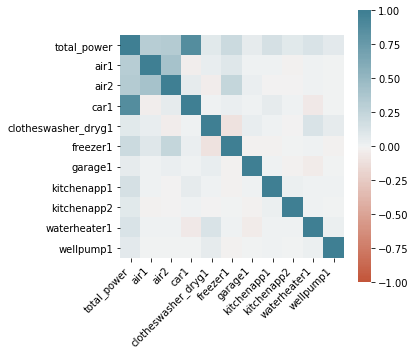

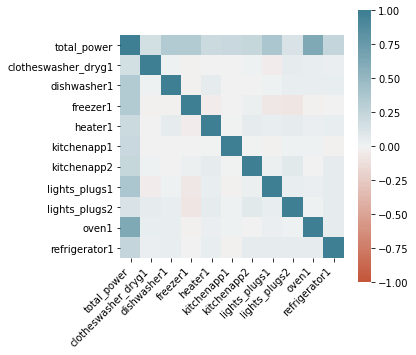

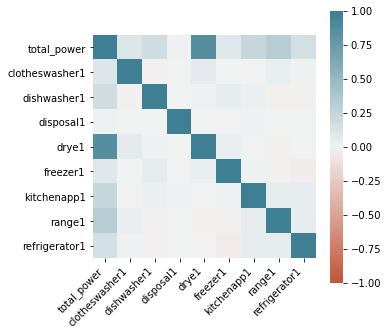

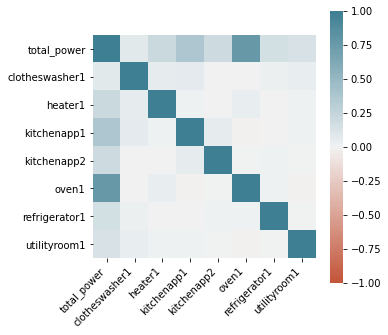

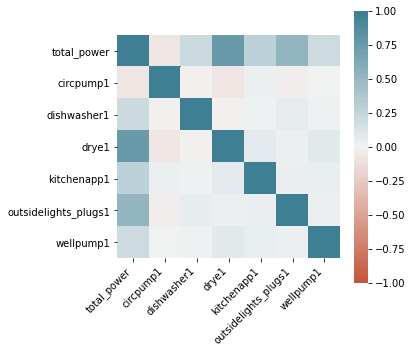

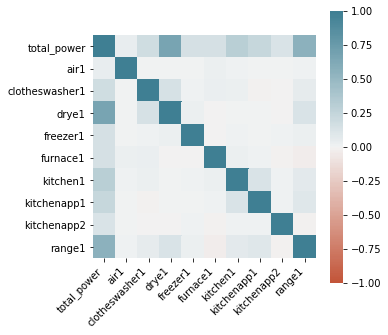

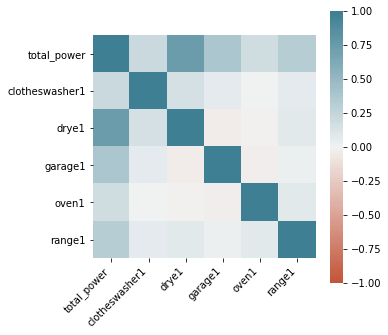

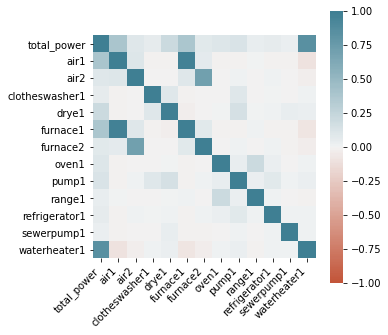

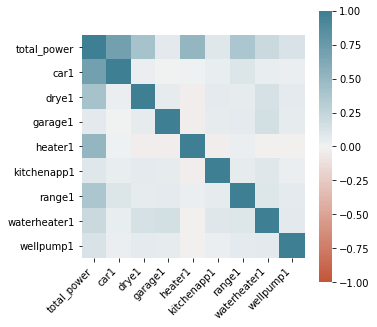

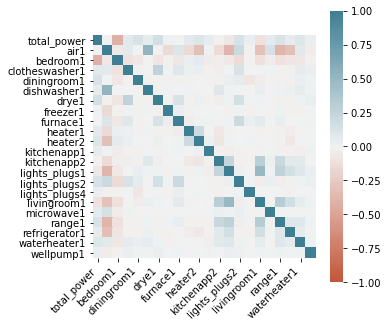

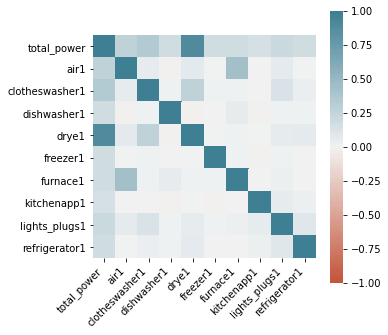

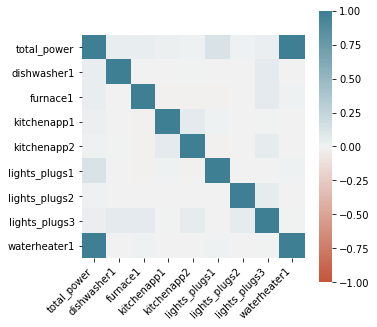

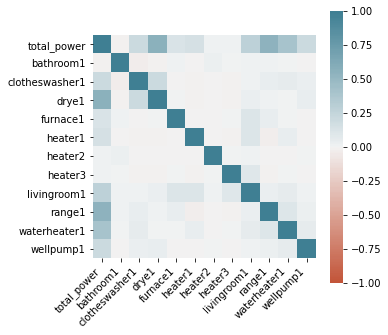

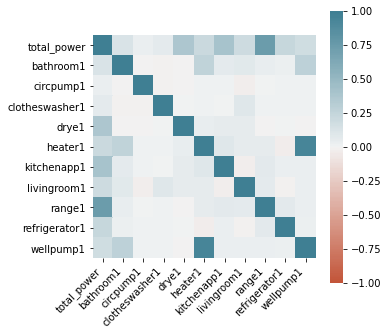

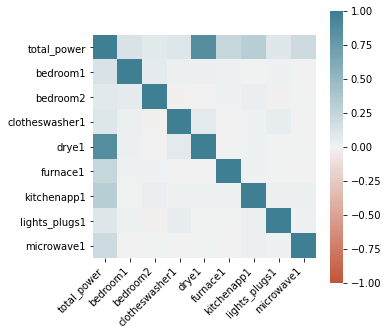

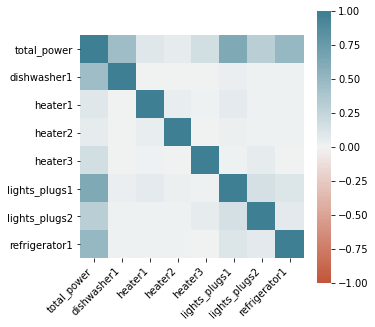

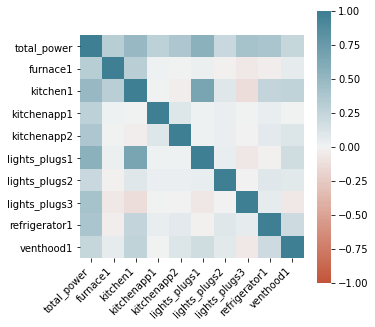

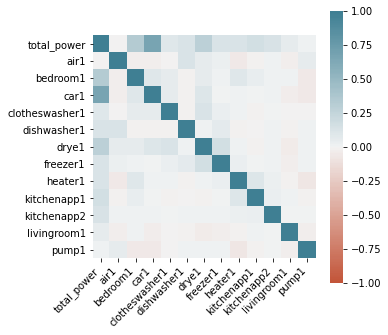

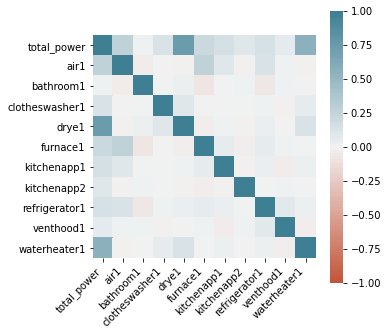

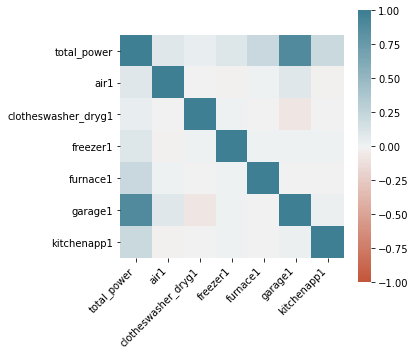

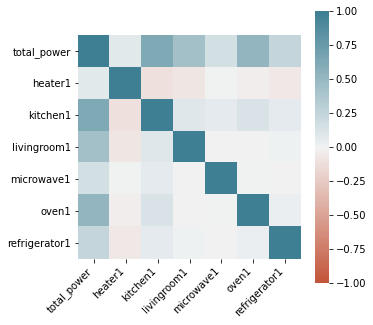

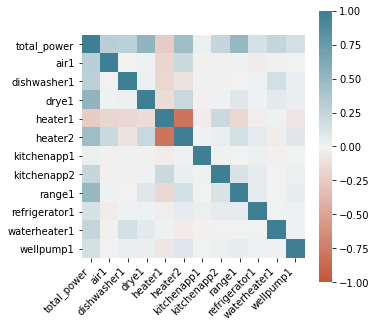

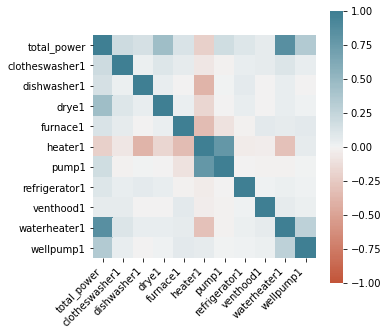

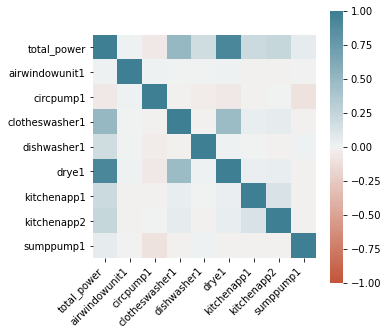

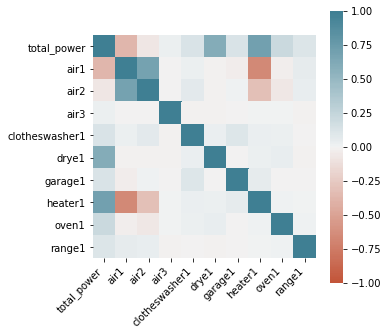

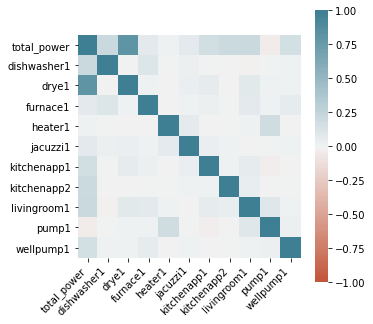

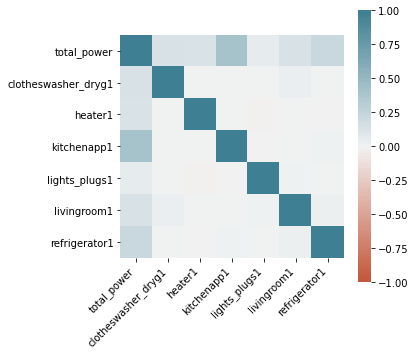

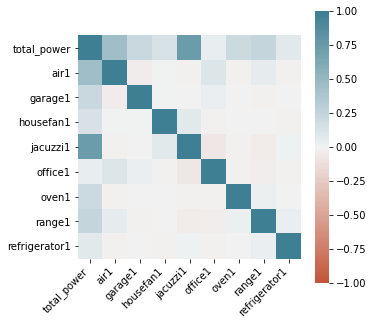

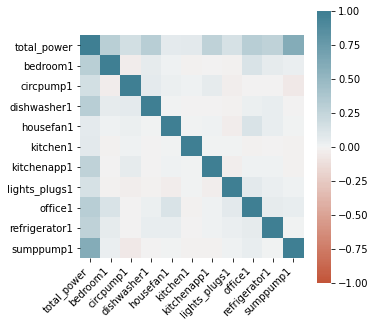

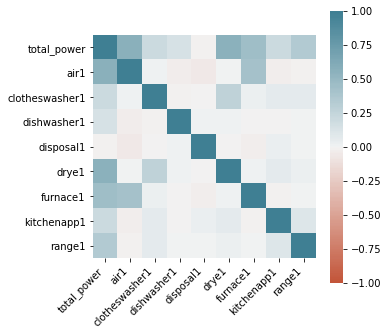

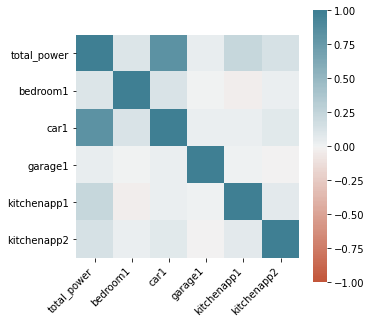

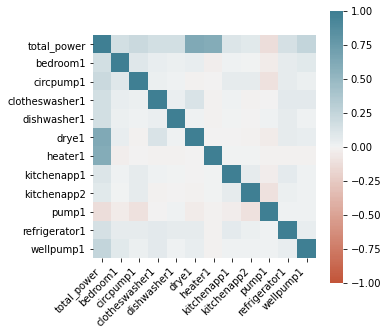

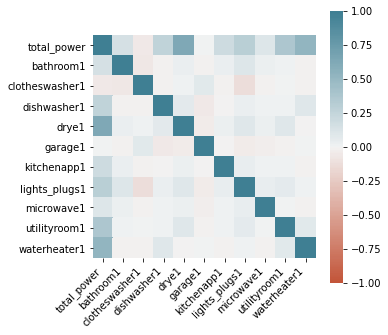

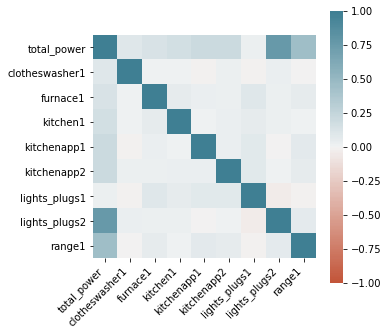

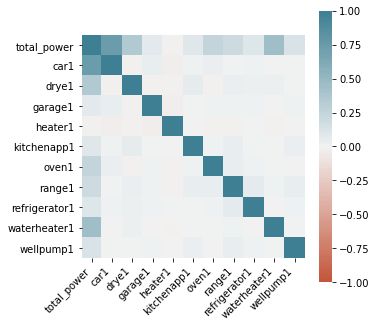

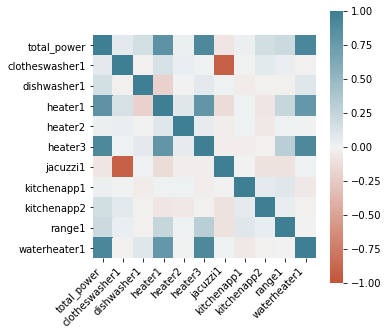

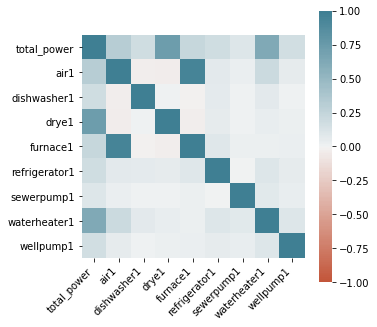

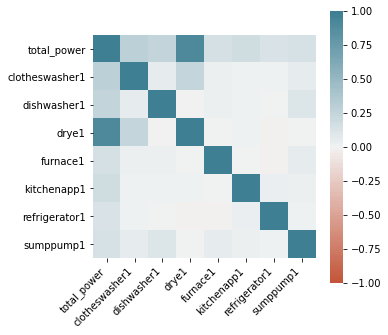

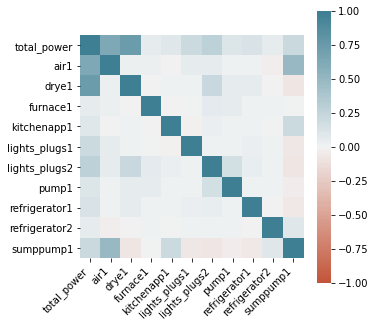

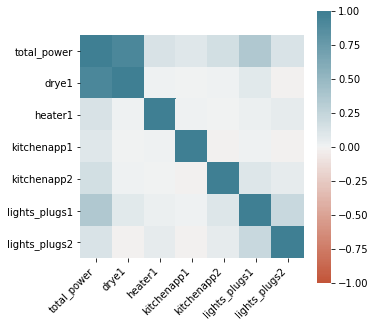

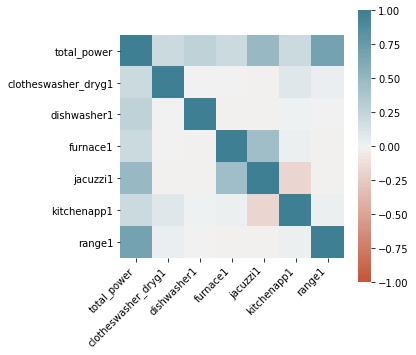

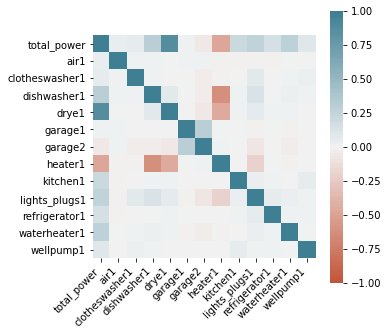

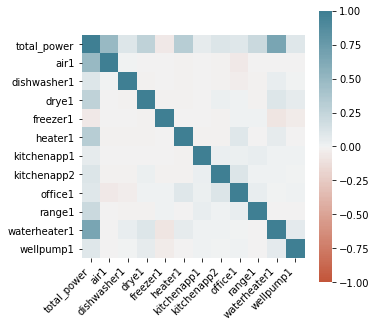

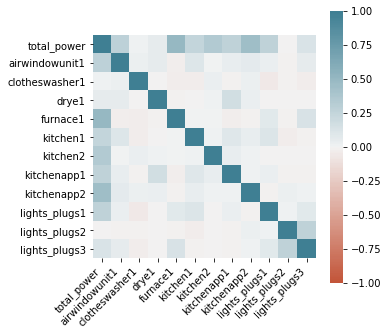

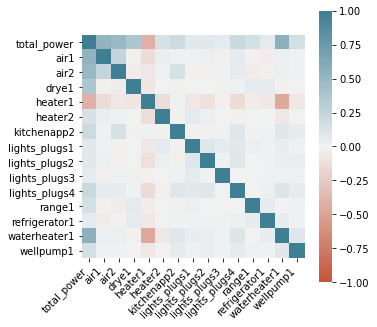

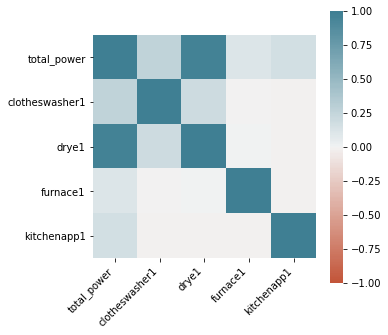

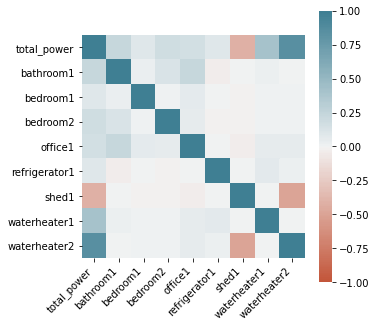

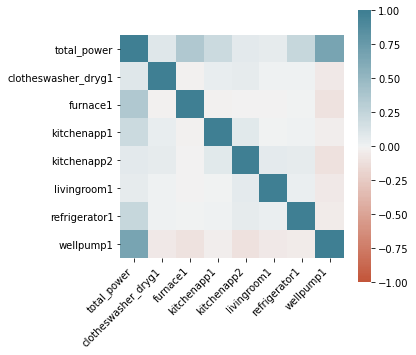

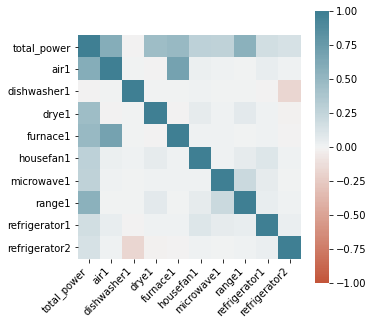

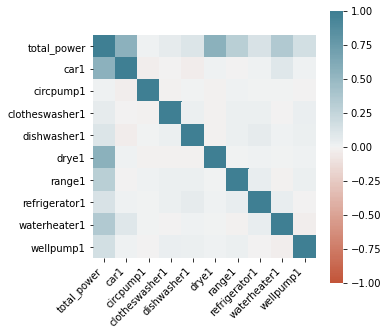

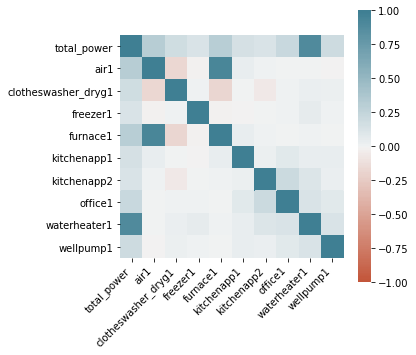

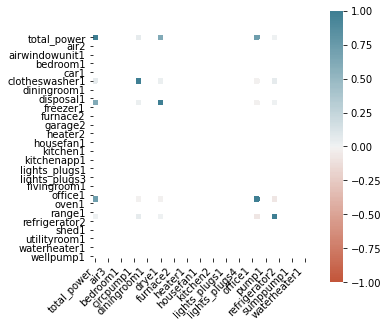

In [20]:
for home in averages:
  plot_corr(home)

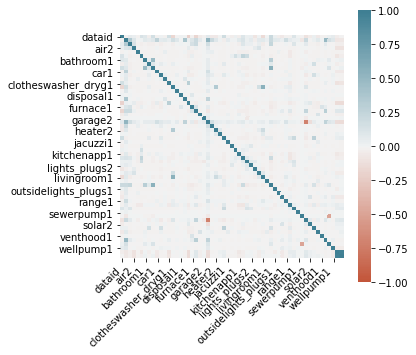

In [13]:
plot_corr(df)